In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 

In [2]:
df=pd.read_csv("shree.csv")

In [3]:
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [8]:
df['Cuisines'] = df['Cuisines'].apply(lambda x: x.split(', ') if isinstance(x, str) else [])


In [10]:
df['Cuisines'] = df['Cuisines'].apply(lambda x: tuple(sorted(x)))


In [11]:
cuisine_combinations = df['Cuisines'].value_counts()

In [12]:
most_common_combination = cuisine_combinations.idxmax()
most_common_count = cuisine_combinations.max()


In [13]:
print(f"The most common cuisine combination is: {most_common_combination} with {most_common_count} occurrences.")

The most common cuisine combination is: ('North Indian',) with 936 occurrences.


In [15]:
average_ratings_by_combination = df.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False)


In [16]:
top_combinations_by_rating = average_ratings_by_combination.head()

In [19]:
print("Top cuisine combinations by average rating:")
print(top_combinations_by_rating)

Top cuisine combinations by average rating:
Cuisines
(World Cuisine,)             4.9
(American, BBQ, Sandwich)    4.9
(American, Sandwich, Tea)    4.9
(Indonesian, Sunda)          4.9
(Hawaiian, Seafood)          4.9
Name: Aggregate rating, dtype: float64


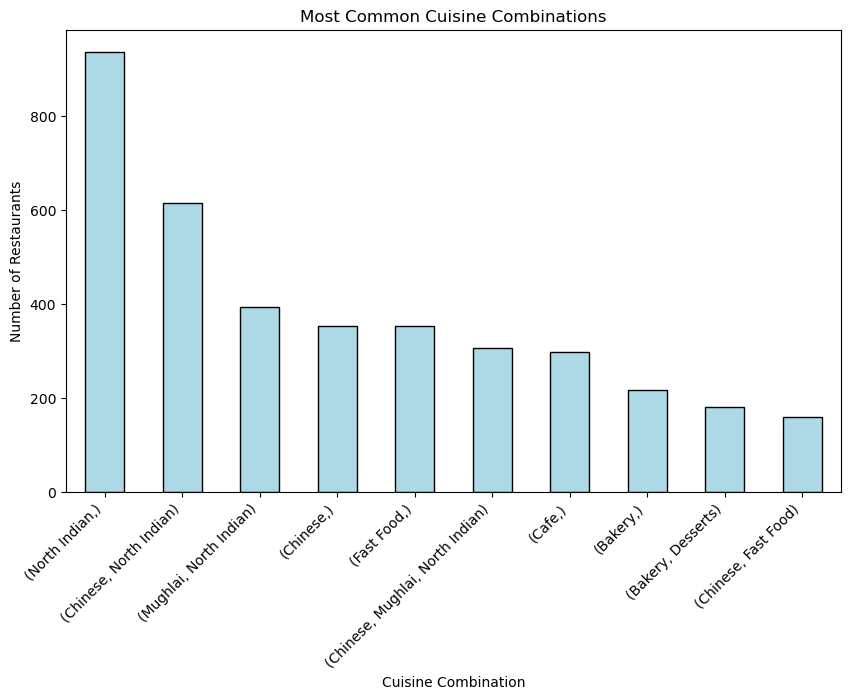

In [20]:
top_combinations = cuisine_combinations.head(10)  # Top 10 for visualization
plt.figure(figsize=(10, 6))
top_combinations.plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Most Common Cuisine Combinations')
plt.xlabel('Cuisine Combination')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45, ha='right')
plt.show()

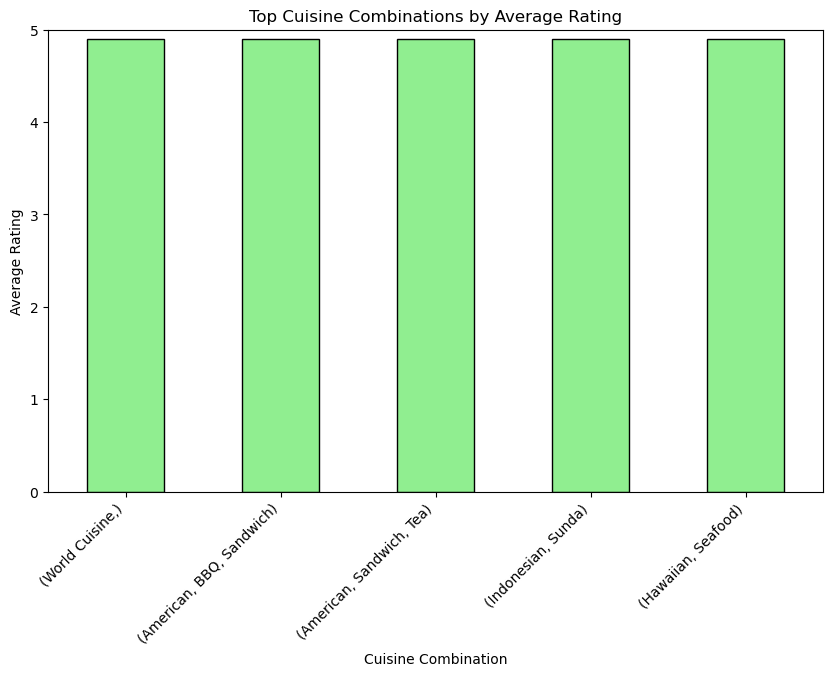

In [21]:
plt.figure(figsize=(10, 6))
top_combinations_by_rating.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Top Cuisine Combinations by Average Rating')
plt.xlabel('Cuisine Combination')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 5)
plt.show()